# **Data Entropy - a measure of uncertainty in Data**

# Definition
In information theory, the entropy of a random variable is the average level of "information" or "uncertainty" inherent in the variable's possible outcomes. Entropy can be defined as a measure of impurity.

⇔ How unpredictable the likelihood of an event is
Entropy: The average amount of information that you get when you receive a message.


# The formula
![alt text](/home/entropy_formula.png)
Where:
* H(X) is the entropy of a random variable 
* X is a discrete random variable with possible values {x1, x2, …, xn}
* P(xi) is the probability that X = xi
* b is the base of the logarithm (usually 2, e or 10)

Properties
* H(1) = 0 ⇔ events that always occur do not offer information (no surprise)
* H(0) = 0: the limit  of p log(p) = 0 as p approaches 0
* entropy ranges from 0 to log(k), where k is the number of classes you have.


# The entropy distribution graph

This program computes impurity metrics, entropy and gini index and tracks their correlation with the classification error. The program plots results for the probability range [0,1).
<br>
The code modified from original version from article <b> SCIKIT-LEARN : DECISION TREE LEARNING I - ENTROPY, GINI, AND INFORMATION GAIN</b> [bogotobogo.com](https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php)

In the other notebooks, we will use sklearn and scipy packages to compute the entropy of a probability distribution, but here, let's start by looking at a manual implementation.

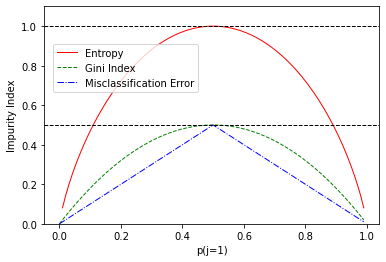

In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np

# Helper functions for data impurity metrics
# p: probability value
# log2 (log base 2)

def gini(p):
   return (p) * (1 - (p)) + (1 - p) * (1 - (1-p))

def entropy(p):
   return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

# Test
# define X = the probability distribution from 0 to 1 with step size = 0.01
x = np.arange(0.0, 1.0, 0.01)

# Compute entropy for each value in X
ent = [entropy(p) if p != 0 else None for p in x]

# Compute classification error for each value in X
gini = [gini(i) for i in x]

# Compute classification error for each value in X
c_err = [classification_error(i) for i in x]

# Plot results

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, gini, c_err],
      ['Entropy', 'Gini Index', 'Misclassification Error'],
      ['-',  '--', '-.'],
      ['red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)
   
ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

# Observations
* Low entropy ⇔ high predictability ⇔ likely biased dataset
* High entropy ⇔ low predictability ⇔ likely balanced dataset

When choosing datasets, preference should be given to balanced sets with high entropy, because they carry more information. 
As a measure of information, entropy can be used to identify unbalanced datasets.
